In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [2]:
properties = pd.read_csv("/kaggle/input/zillow-prize-1/properties_2016.csv", low_memory=False) 

In [3]:
properties.head(10) 

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,7.0,NaN,NaN,...,1.0,NaN,176383.0,283315.0,2015.0,106932.0,3661.28,NaN,NaN,NaN
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,397945.0,554573.0,2015.0,156628.0,6773.34,NaN,NaN,NaN
7,10940747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,101998.0,688486.0,2015.0,586488.0,7857.84,NaN,NaN,NaN
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,218440.0,261201.0,2015.0,42761.0,4054.76,NaN,NaN,NaN


In [4]:
rename_map = {
    "parcelid": "parcel_id",
    "airconditioningtypeid": "ac_type",
    "architecturalstyletypeid": "architecture_style",
    "basementsqft": "basement_sqft",
    "bathroomcnt": "bathroom_count",
    "bedroomcnt": "bedroom_count",
    "buildingclasstypeid": "building_class",
    "buildingqualitytypeid": "building_quality",
    "calculatedbathnbr": "calculated_bath_count",
    "calculatedfinishedsquarefeet": "total_finished_sqft",
    "decktypeid": "deck_type",
    "finishedfloor1squarefeet": "first_floor_sqft",
    "finishedsquarefeet12": "living_area_sqft",
    "finishedsquarefeet13": "perimeter_living_area_sqft",
    "finishedsquarefeet15": "total_finished_area_sqft",
    "finishedsquarefeet50": "garage_sqft",
    "finishedsquarefeet6": "basement_finished_sqft",
    "fireplacecnt": "fireplace_count",
    "fullbathcnt": "full_bath_count",
    "garagecarcnt": "garage_car_count",
    "garagetotalsqft": "garage_total_sqft",
    "hashottuborspa": "has_hot_tub",
    "heatingorsystemtypeid": "heating_system_type",
    "latitude": "latitude",
    "longitude": "longitude",
    "lotsizesquarefeet": "lot_size_sqft",
    "poolcnt": "pool_count",
    "poolsizesum": "pool_total_area",
    "pooltypeid2": "pool_type2",
    "pooltypeid7": "pool_type_spa",
    "pooltypeid10": "pool_type_luxury",
    "propertycountylandusecode": "county_landuse_code",
    "propertylandusetypeid": "landuse_type",
    "propertyzoningdesc": "zoning_description",
    "rawcensustractandblock": "raw_census_tract_block",
    "regionidcity": "city_id",
    "regionidcounty": "county_id",
    "regionidneighborhood": "neighborhood_id",
    "regionidzip": "zip_id",
    "roomcnt": "room_count",
    "storytypeid": "story_type",
    "threequarterbathnbr": "three_quarter_bath_count",
    "typeconstructiontypeid": "construction_type",
    "unitcnt": "unit_count",
    "yardbuildingsqft17": "patio_sqft",
    "yardbuildingsqft26": "shed_sqft",
    "yearbuilt": "year_built",
    "numberofstories": "number_of_stories",
    "structuretaxvaluedollarcnt": "structure_tax_value",
    "taxvaluedollarcnt": "total_tax_value",
    "assessmentyear": "assessment_year",
    "landtaxvaluedollarcnt": "land_tax_value",
    "taxamount": "tax_amount",
    "taxdelinquencyflag": "tax_delinquent_flag",
    "taxdelinquencyyear": "tax_delinquent_year",
    "censustractandblock": "census_tract_block"
}
properties.rename(columns=rename_map, inplace=True)

In [5]:
print("Shape : ", properties.shape)

Shape :  (2985217, 58)


In [6]:
print("Information :", properties.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   parcel_id                   int64  
 1   ac_type                     float64
 2   architecture_style          float64
 3   basement_sqft               float64
 4   bathroom_count              float64
 5   bedroom_count               float64
 6   building_class              float64
 7   building_quality            float64
 8   calculated_bath_count       float64
 9   deck_type                   float64
 10  first_floor_sqft            float64
 11  total_finished_sqft         float64
 12  living_area_sqft            float64
 13  perimeter_living_area_sqft  float64
 14  total_finished_area_sqft    float64
 15  garage_sqft                 float64
 16  basement_finished_sqft      float64
 17  fips                        float64
 18  fireplace_count             float64
 19  full_bath_count      

In [7]:
print('Description : \n', properties.describe())

Description : 
           parcel_id        ac_type  architecture_style  basement_sqft  \
count  2.985217e+06  811519.000000         6061.000000    1628.000000   
mean   1.332586e+07       1.931166            7.202607     646.883292   
std    7.909966e+06       3.148587            2.436290     538.793473   
min    1.071172e+07       1.000000            2.000000      20.000000   
25%    1.164371e+07       1.000000            7.000000     272.000000   
50%    1.254509e+07       1.000000            7.000000     534.000000   
75%    1.409712e+07       1.000000            7.000000     847.250000   
max    1.696019e+08      13.000000           27.000000    8516.000000   

       bathroom_count  bedroom_count  building_class  building_quality  \
count    2.973755e+06   2.973767e+06    12629.000000      1.938488e+06   
mean     2.209143e+00   3.088949e+00        3.725948      5.784787e+00   
std      1.077754e+00   1.275859e+00        0.501700      1.805352e+00   
min      0.000000e+00   0.0000

In [8]:
print("Numeric Columns : \n", properties.select_dtypes(include=[np.number]).columns)

Numeric Columns : 
 Index(['parcel_id', 'ac_type', 'architecture_style', 'basement_sqft',
       'bathroom_count', 'bedroom_count', 'building_class', 'building_quality',
       'calculated_bath_count', 'deck_type', 'first_floor_sqft',
       'total_finished_sqft', 'living_area_sqft', 'perimeter_living_area_sqft',
       'total_finished_area_sqft', 'garage_sqft', 'basement_finished_sqft',
       'fips', 'fireplace_count', 'full_bath_count', 'garage_car_count',
       'garage_total_sqft', 'heating_system_type', 'latitude', 'longitude',
       'lot_size_sqft', 'pool_count', 'pool_total_area', 'pool_type_luxury',
       'pool_type2', 'pool_type_spa', 'landuse_type', 'raw_census_tract_block',
       'city_id', 'county_id', 'neighborhood_id', 'zip_id', 'room_count',
       'story_type', 'three_quarter_bath_count', 'construction_type',
       'unit_count', 'patio_sqft', 'shed_sqft', 'year_built',
       'number_of_stories', 'structure_tax_value', 'total_tax_value',
       'assessment_year', '

In [9]:
print("Categorical Columns : \n", properties.select_dtypes(include=['object']).columns)

Categorical Columns : 
 Index(['has_hot_tub', 'county_landuse_code', 'zoning_description',
       'fireplaceflag', 'tax_delinquent_flag'],
      dtype='object')


In [10]:
missing = (properties.isna().mean() * 100).sort_values(ascending=False)
print("\nMissing percentage per column:")
print(missing)


Missing percentage per column:
story_type                    99.945599
basement_sqft                 99.945465
shed_sqft                     99.911330
fireplaceflag                 99.827048
architecture_style            99.796966
construction_type             99.773986
perimeter_living_area_sqft    99.743000
building_class                99.576949
deck_type                     99.427311
basement_finished_sqft        99.263002
pool_total_area               99.063385
pool_type2                    98.925539
pool_type_luxury              98.762603
tax_delinquent_flag           98.108613
tax_delinquent_year           98.108546
has_hot_tub                   97.688141
patio_sqft                    97.308236
total_finished_area_sqft      93.608572
first_floor_sqft              93.209304
garage_sqft                   93.209304
three_quarter_bath_count      89.560859
fireplace_count               89.527160
pool_type_spa                 83.737899
pool_count                    82.663438
number_o

In [11]:
def clean_and_group_properties(properties):

#1)LIVING AREA / SQFT GROUP 
    properties['home_size_sqft'] = (
        properties['finishedsquarefeet12']
        .fillna(properties['calculatedfinishedsquarefeet'])
        .fillna(properties['finishedsquarefeet15'])
    )

    properties['log_home_size'] = np.log1p(properties['home_size_sqft'])

    properties['sqft_per_room'] = properties['home_size_sqft'] / (properties['roomcnt'].replace(0, np.nan))
    properties['sqft_per_bed'] = properties['home_size_sqft'] / (properties['bedroomcnt'].replace(0, np.nan))


#2)GARAGE GROUP
    properties['garage_missing'] = properties['garagecarcnt'].isna().astype(int)
    properties['has_garage'] = (properties['garagecarcnt'] > 0).astype(int)
    properties['garage_car_count'] = properties['garagecarcnt'].fillna(0)
    properties['garage_sqft'] = properties['garagetotalsqft'].fillna(0)

#3)POOL GROUP
    properties['has_pool'] = (
        (properties['poolcnt'] > 0) |
        properties['pooltypeid7'].notna() |
        properties['pooltypeid2'].notna() |
        properties['pooltypeid10'].notna()
    ).astype(int)
    properties['is_spa'] = properties['pooltypeid7'].notna().astype(int)
    properties['has_luxury_pool'] = properties['pooltypeid10'].notna().astype(int)

#4)BATHROOMS GROUP
    properties['bathrooms'] = (
        properties['bathroomcnt']
        .fillna(properties['calculatedbathnbr'])
    )
    properties['has_fullbath'] = properties['fullbathcnt'].fillna(0).astype(int)

#5)TAX VALUE GROUP
    properties['land_to_structure_ratio'] = properties['landtaxvaluedollarcnt'] / (
        properties['structuretaxvaluedollarcnt'].replace(0, np.nan)
    )
    properties['effective_tax_rate'] = properties['taxamount'] / (
        properties['taxvaluedollarcnt'].replace(0, np.nan)
    )
    properties['log_total_tax_value'] = np.log1p(properties['taxvaluedollarcnt'])


#6)BUILDING QUALITY / SYSTEMS
    properties['has_ac'] = properties['airconditioningtypeid'].notna().astype(int)
    properties['has_heating'] = properties['heatingorsystemtypeid'].notna().astype(int)
    properties['multi_story'] = (properties['numberofstories'] > 1).astype(int)

#7)LOCATION GROUP
    properties['lat'] = properties['latitude'] / 1e6
    properties['lon'] = properties['longitude'] / 1e6

#8) DROP USELESS / DUPLICATE / HIGH-MISSING COLUMNS
    drop_cols = [
        # VERY high missing and useless
        'basementsqft', 'yardbuildingsqft26', 'decktypeid', 'finishedsquarefeet13',
        'buildingclasstypeid', 'poolsizesum', 'pooltypeid2', 'pooltypeid10',
        'storytypeid', 'architecturalstyletypeid',

        # redundant or internal IDs
        'censustractandblock', 'rawcensustractandblock',

        # columns we replaced with grouped features
        'garagecarcnt', 'garagetotalsqft', 'poolcnt',
        'finishedsquarefeet12', 'calculatedfinishedsquarefeet',
        'finishedsquarefeet15', 'fullbathcnt', 'threequarterbathnbr',
        'bathroomcnt', 'calculatedbathnbr'
    ]

    properties.drop(columns=[c for c in drop_cols if c in properties.columns], inplace=True)
    return properties

In [12]:
properties = pd.read_csv("/kaggle/input/zillow-prize-1/properties_2016.csv", low_memory=False)
df_clean = clean_and_group_properties(properties)

df_clean.head()

,parcelid,airconditioningtypeid,bedroomcnt,buildingqualitytypeid,finishedfloor1squarefeet,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,hashottuborspa,...,bathrooms,has_fullbath,land_to_structure_ratio,effective_tax_rate,log_total_tax_value,has_ac,has_heating,multi_story,lat,lon
0,10754147,NaN,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,...,0.0,0,NaN,NaN,2.302585,0,0,0,34.144442,-118.654084
1,10759547,NaN,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,...,0.0,0,NaN,NaN,10.222559,0,0,0,34.140430,-118.625364
2,10843547,NaN,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,...,0.0,0,1.171915,0.014717,14.161500,0,0,0,33.989359,-118.394633
3,10859147,NaN,0.0,7.0,NaN,NaN,NaN,6037.0,NaN,NaN,...,0.0,0,1.024752,0.012584,13.961198,0,0,0,34.148863,-118.437206
4,10879947,NaN,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,...,0.0,0,1.236842,0.013207,12.979629,0,0,0,34.194168,-118.385816


In [13]:
print(df_clean.columns)

Index(['parcelid', 'airconditioningtypeid', 'bedroomcnt',
       'buildingqualitytypeid', 'finishedfloor1squarefeet',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'hashottuborspa', 'heatingorsystemtypeid', 'latitude', 'longitude',
       'lotsizesquarefeet', 'pooltypeid7', 'propertycountylandusecode',
       'propertylandusetypeid', 'propertyzoningdesc', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'typeconstructiontypeid', 'unitcnt', 'yardbuildingsqft17', 'yearbuilt',
       'numberofstories', 'fireplaceflag', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'taxdelinquencyflag', 'taxdelinquencyyear',
       'home_size_sqft', 'log_home_size', 'sqft_per_room', 'sqft_per_bed',
       'garage_missing', 'has_garage', 'garage_car_count', 'garage_sqft',
       'has_pool', 'is_spa', 'has_luxury_pool', 'bathrooms', 'has_fullbath',

In [14]:
columns_to_drop_asthey_determine_only_minutely = [
    'propertycountylandusecode',
    'propertylandusetypeid',
    'propertyzoningdesc',
    'typeconstructiontypeid',
    'assessmentyear',
    'taxdelinquencyflag',
    'taxdelinquencyyear',
    'fireplaceflag'
]

df_clean.drop(columns=columns_to_drop_asthey_determine_only_minutely, inplace=True, errors='ignore')


In [15]:
df_clean.drop(columns='airconditioningtypeid', inplace=True, errors='ignore')


In [16]:
fill_zero = [
    'finishedsquarefeet6', 'hashottuborspa', 'yardbuildingsqft17',
    'finishedfloor1squarefeet', 'finishedsquarefeet50', 'fireplacecnt',
    'pooltypeid7', 'numberofstories', 'unitcnt', 'sqft_per_room',
    'sqft_per_bed', 'garage_sqft', 'garage_car_count', 'has_fullbath'
]

for col in fill_zero:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(0)

In [17]:
fill_minus_one = [
        'heatingorsystemtypeid',
        'buildingqualitytypeid',
        'regionidneighborhood',
        'regionidcity',
        'regionidzip',
        'regionidcounty',
        'fips'
    ]

for col in fill_minus_one:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(-1).astype(int)

In [18]:
fill_median = [
    'lotsizesquarefeet',
    'landtaxvaluedollarcnt',
    'yearbuilt',
    'home_size_sqft',
    'log_home_size',
    'structuretaxvaluedollarcnt',
    'taxvaluedollarcnt',
    'log_total_tax_value',
    'taxamount',
    'roomcnt',
    'bathrooms',
    'bedroomcnt'
]

for col in fill_median:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

In [19]:
df_clean = df_clean.dropna(subset=['latitude', 'longitude'], how='any')
df_clean['lat'] = df_clean['latitude'] / 1e6
df_clean['lon'] = df_clean['longitude'] / 1e6

In [20]:
missing = (df_clean.isna().mean() * 100).sort_values(ascending=False)
print("\nMissing percentage per column:")
print(missing)


Missing percentage per column:
land_to_structure_ratio       2.311133
effective_tax_rate            1.470015
parcelid                      0.000000
bedroomcnt                    0.000000
finishedsquarefeet50          0.000000
finishedsquarefeet6           0.000000
buildingqualitytypeid         0.000000
finishedfloor1squarefeet      0.000000
hashottuborspa                0.000000
heatingorsystemtypeid         0.000000
latitude                      0.000000
longitude                     0.000000
lotsizesquarefeet             0.000000
pooltypeid7                   0.000000
fips                          0.000000
fireplacecnt                  0.000000
regionidcounty                0.000000
regionidcity                  0.000000
regionidneighborhood          0.000000
regionidzip                   0.000000
yardbuildingsqft17            0.000000
yearbuilt                     0.000000
roomcnt                       0.000000
unitcnt                       0.000000
taxvaluedollarcnt             0.

In [21]:
df_clean.to_csv("/kaggle/working/df_clean.csv", index=False)
print("Saved df_clean.csv")

Saved df_clean.csv


In [22]:
train = pd.read_csv("/kaggle/input/zillow-prize-1/train_2016_v2.csv", low_memory=False)
df_clean = pd.read_csv("/kaggle/working/df_clean.csv", low_memory=False)

merged = train.merge(
    df_clean,
    on="parcelid",
    how="left"
)

print("Merged shape:", merged.shape)

Merged shape: (90275, 50)


In [23]:
merged['transactiondate'] = pd.to_datetime(merged['transactiondate'])
merged['trans_year'] = merged['transactiondate'].dt.year
merged['trans_month'] = merged['transactiondate'].dt.month
merged['trans_quarter'] = merged['transactiondate'].dt.quarter

merged = merged.drop(columns=['transactiondate'])

In [24]:
merged.isna().sum().sort_values(ascending=False).head(10)

land_to_structure_ratio     380
effective_tax_rate            7
parcelid                      0
logerror                      0
finishedfloor1squarefeet      0
finishedsquarefeet50          0
finishedsquarefeet6           0
fips                          0
fireplacecnt                  0
hashottuborspa                0
dtype: int64

In [25]:
merged['land_to_structure_ratio'] = (merged['landtaxvaluedollarcnt'] / (merged['structuretaxvaluedollarcnt'] + 1))
merged['effective_tax_rate'] = ( merged['taxamount'] / (merged['taxvaluedollarcnt'] + 1))

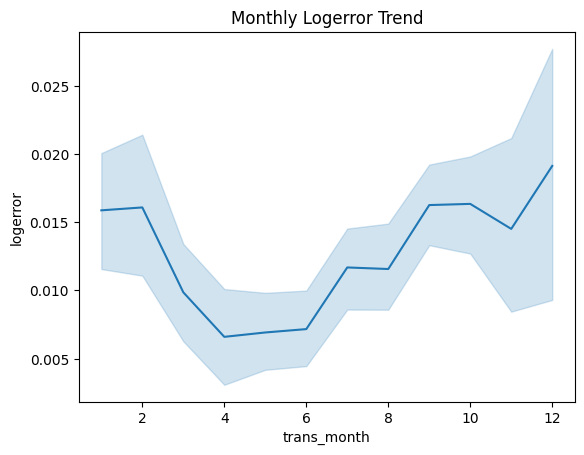

In [26]:
import seaborn as sns
merged.groupby('trans_month')['logerror'].mean()
sns.lineplot(data=merged, x='trans_month', y='logerror')
plt.title("Monthly Logerror Trend")
plt.show()

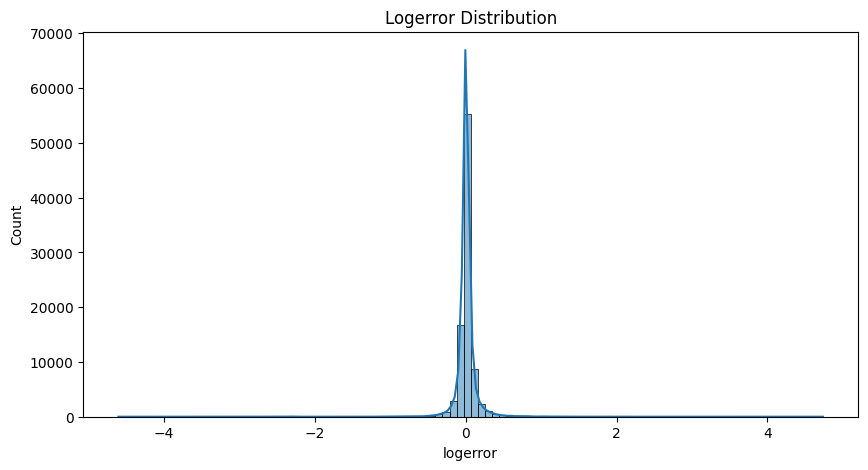

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(merged['logerror'], kde=True, bins=100)
plt.title("Logerror Distribution")
plt.xlabel("logerror")
plt.ylabel("Count")
plt.show()

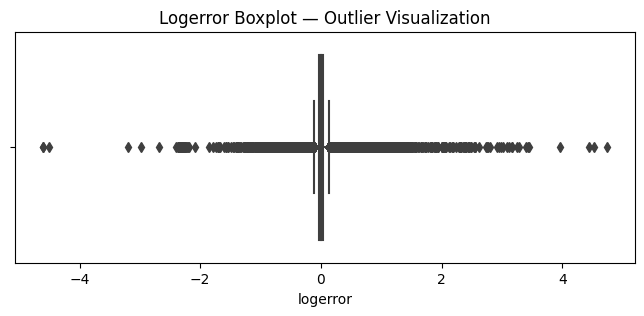

In [28]:
plt.figure(figsize=(8,3))
sns.boxplot(x=merged['logerror'])
plt.title("Logerror Boxplot — Outlier Visualization")
plt.show()

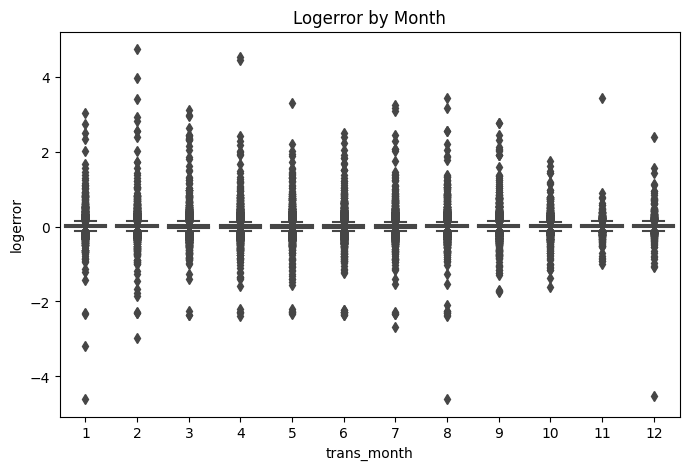

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(data=merged, x='trans_month', y='logerror')
plt.title("Logerror by Month")
plt.show()

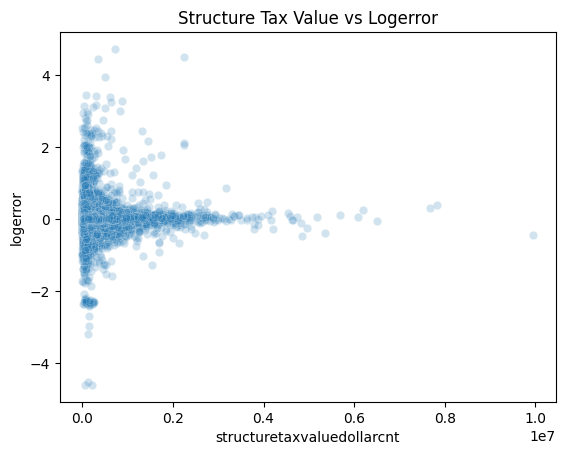

In [30]:
sns.scatterplot(data=merged, x='structuretaxvaluedollarcnt', y='logerror', alpha=0.2)
plt.title("Structure Tax Value vs Logerror")
plt.show()

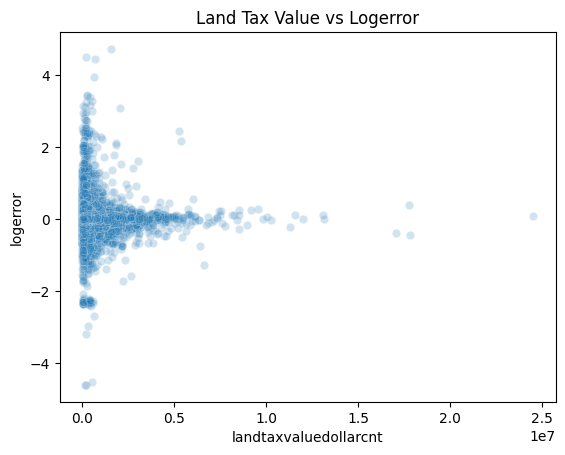

In [31]:
sns.scatterplot(data=merged, x='landtaxvaluedollarcnt', y='logerror', alpha=0.2)
plt.title("Land Tax Value vs Logerror")
plt.show()

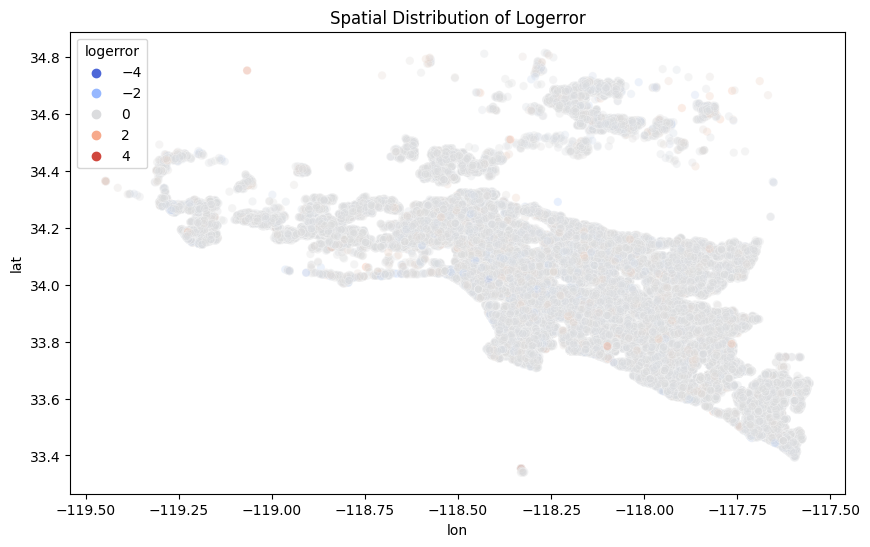

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged, x='lon', y='lat', hue='logerror', alpha=0.3, palette='coolwarm')
plt.title("Spatial Distribution of Logerror")
plt.show()

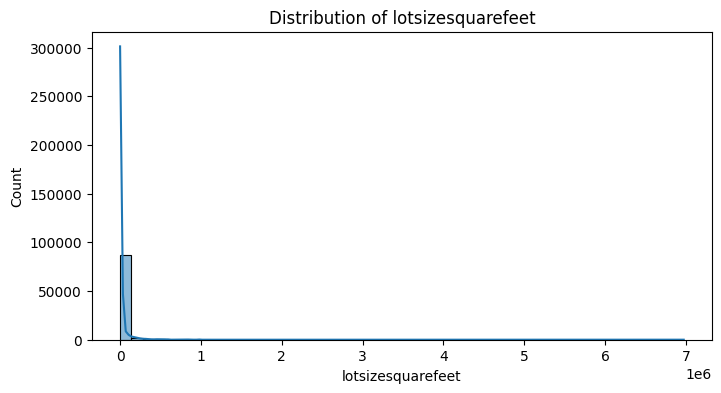

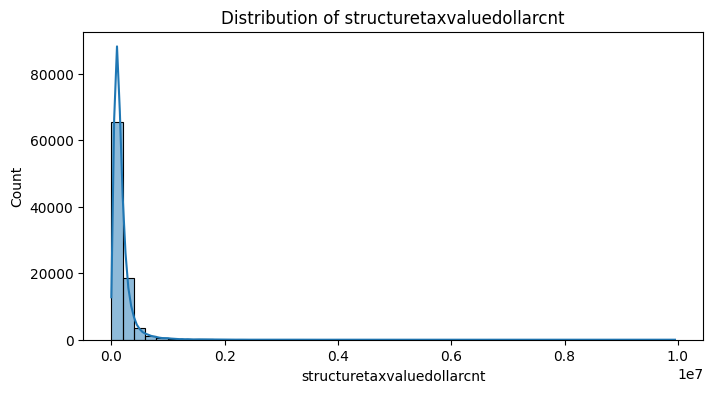

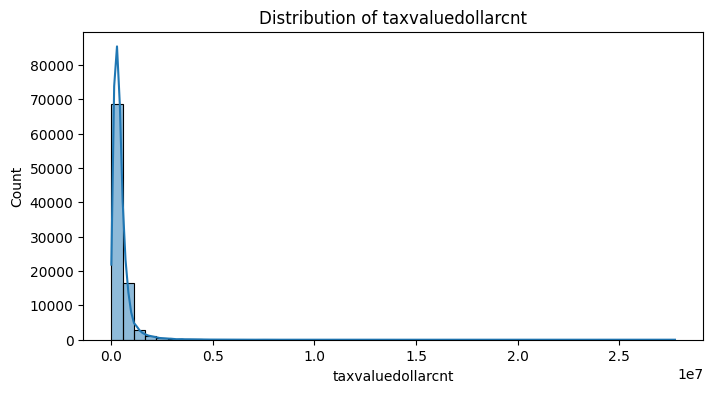

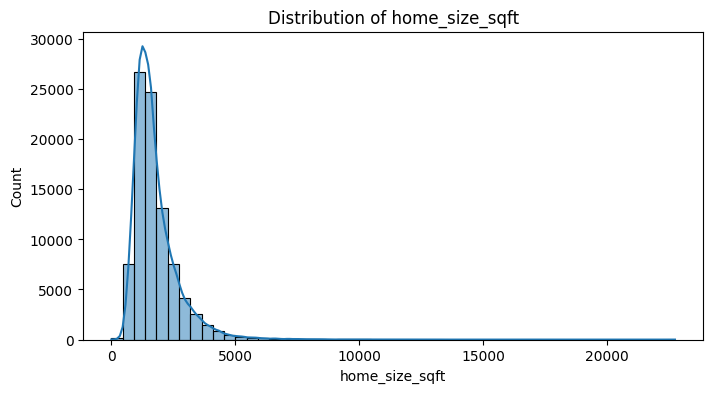

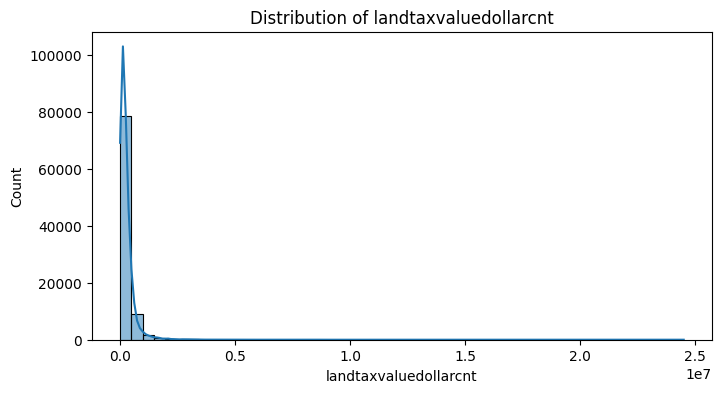

In [33]:
num_cols = [
    'lotsizesquarefeet', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
    'home_size_sqft', 'landtaxvaluedollarcnt'
]

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(merged[col], kde=True, bins=50)
    plt.title(f"Distribution of {col}")
    plt.show()

In [34]:
merged = merged[merged['logerror'].abs() <= 0.4]

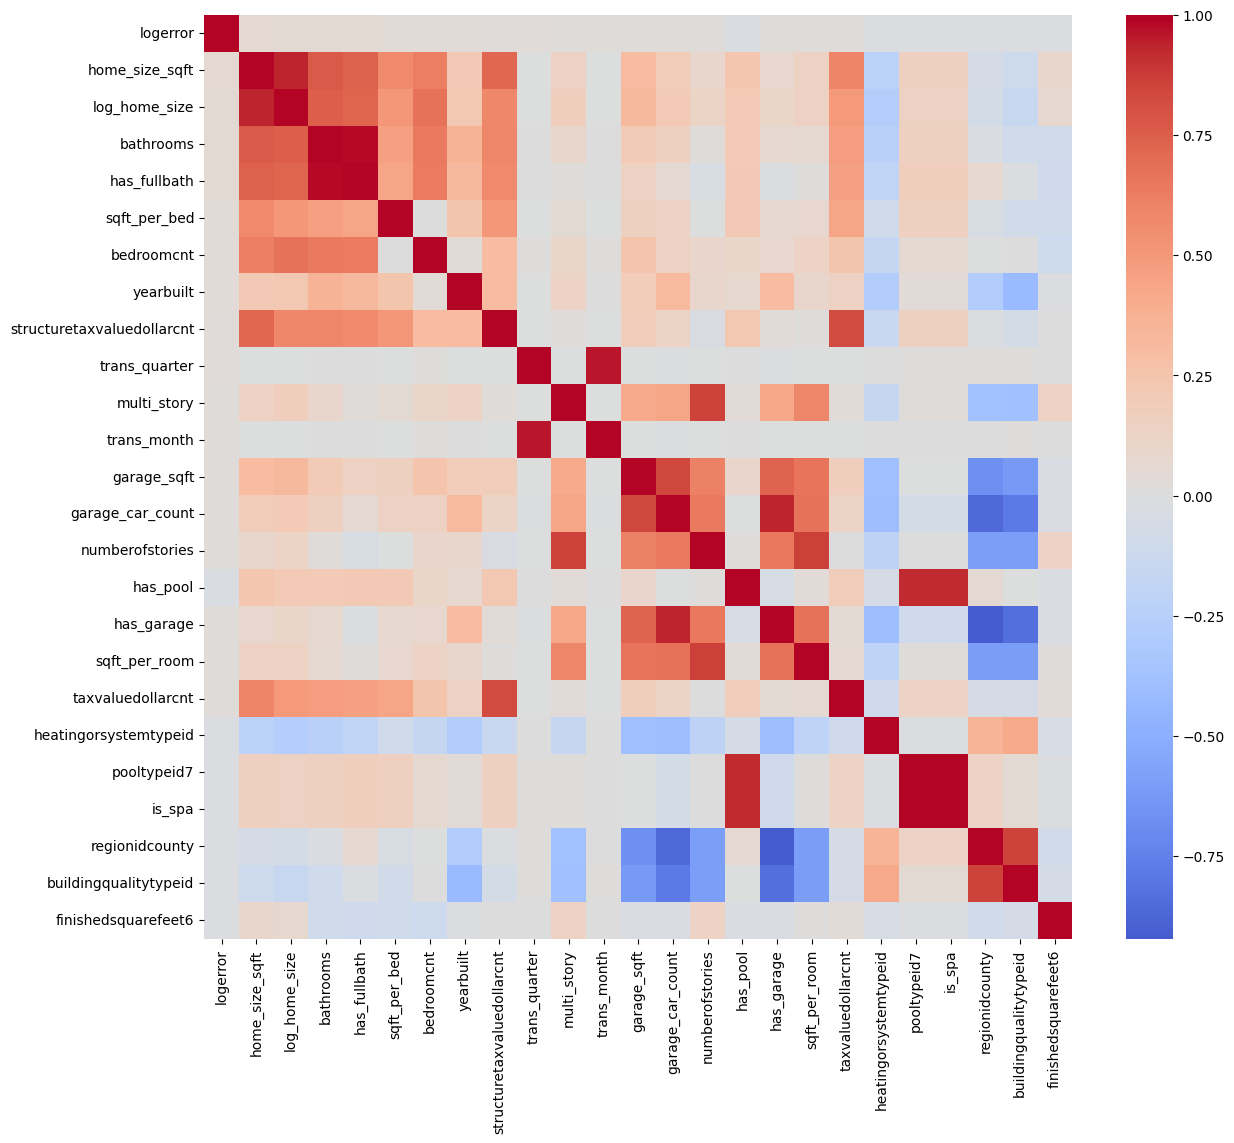

In [35]:
corr_matrix = merged.corr(numeric_only=True)

top_features = corr_matrix['logerror'].abs().sort_values(ascending=False).head(25).index
corr_top = corr_matrix.loc[top_features, top_features]

plt.figure(figsize=(14, 12))
sns.heatmap(corr_top, annot=False, cmap='coolwarm', center=0)
plt.show()

In [36]:
X = merged.drop(columns=['logerror'])
y = merged['logerror']

In [37]:
cat_cols = [
    'regionidcity', 'regionidcounty', 'regionidzip', 
    'regionidneighborhood', 'heatingorsystemtypeid',
    'buildingqualitytypeid', 'fips'
]

for col in cat_cols:
    if col in X.columns:
        X[col] = X[col].astype('category')

In [38]:
bool_cols = ['has_pool', 'is_spa', 'has_luxury_pool', 
             'has_garage', 'garage_missing', 
             'has_ac', 'has_heating', 'multi_story', 'has_fullbath']

for col in bool_cols:
    if col in X.columns:
        X[col] = X[col].astype(str).replace({'True': 1, 'False': 0, 'true': 1, 'false': 0})
        X[col] = X[col].astype(float)

X['hashottuborspa'] = X['hashottuborspa'].astype(str).replace(
    {'True': 1, 'False': 0, 'true': 1, 'false': 0}
)
X['hashottuborspa'] = X['hashottuborspa'].astype(float)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [41]:
pred_lr = lr.predict(X_val)
print("Linear Regression MAE:", mean_absolute_error(y_val, pred_lr))

Linear Regression MAE: 0.05180650130569451


In [42]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

pred_ridge = ridge.predict(X_val)
print("Ridge MAE:", mean_absolute_error(y_val, pred_ridge))

Ridge MAE: 0.05180975415010946


In [43]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.0005)
lasso.fit(X_train, y_train)

pred_lasso = lasso.predict(X_val)
print("Lasso MAE:", mean_absolute_error(y_val, pred_lasso))

Lasso MAE: 0.05180365395431768


In [44]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=0.001, l1_ratio=0.5)
enet.fit(X_train, y_train)

pred_enet = enet.predict(X_val)
print("ElasticNet MAE:", mean_absolute_error(y_val, pred_enet))

ElasticNet MAE: 0.05180384480777387


In [45]:
from sklearn.model_selection import GridSearchCV

params_ridge = {'alpha': [0.1, 1, 10, 50, 100]}

grid_ridge = GridSearchCV(Ridge(), params_ridge, scoring='neg_mean_absolute_error', cv=5)
grid_ridge.fit(X_train, y_train)

print("Best Ridge MAE:", -grid_ridge.best_score_)
print("Best alpha:", grid_ridge.best_params_)

Best Ridge MAE: 0.05284564350377594
Best alpha: {'alpha': 100}


In [46]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
params_ridge = {"alpha": np.logspace(-3, 3, 100)}

ridge = Ridge()
rand_ridge = RandomizedSearchCV(
    ridge,
    params_ridge,
    n_iter=15,             
    scoring='neg_mean_absolute_error',
    cv=5,
    random_state=42,
    n_jobs=-1
)
rand_ridge.fit(X_train, y_train)

print("Best Ridge MAE:", -rand_ridge.best_score_)
print("Best alpha:", rand_ridge.best_params_)

Best Ridge MAE: 0.05283800440619496
Best alpha: {'alpha': 284.8035868435805}


In [47]:
# Convert string booleans to numeric
merged['hashottuborspa'] = merged['hashottuborspa'].replace({
    'True': 1,
    'False': 0,
    '0': 0,
    0: 0
})

# Force numeric
merged['hashottuborspa'] = pd.to_numeric(merged['hashottuborspa'], errors='coerce').fillna(0)

Lasso MAE: 0.051803433750910455


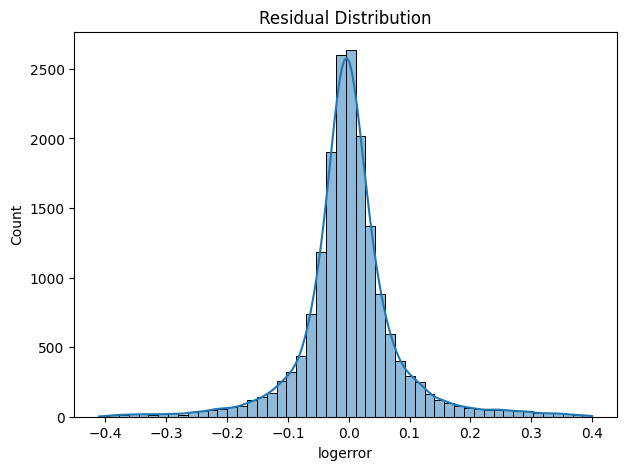

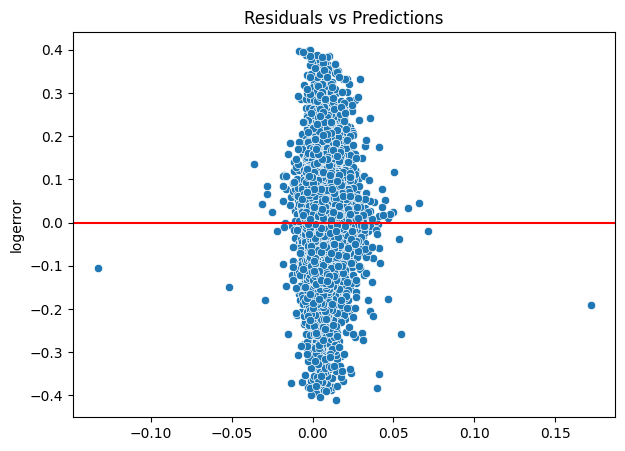

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

X = merged.drop(columns=['logerror'])
y = merged['logerror']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)

lasso = Lasso(alpha=0.0005, max_iter=5000)
lasso.fit(X_train_scaled, y_train)
pred_lasso = lasso.predict(X_val_scaled)
mae = mean_absolute_error(y_val, pred_lasso)
print("Lasso MAE:", mae)

residuals = y_val - pred_lasso

plt.figure(figsize=(7,5))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Residual Distribution")
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(x=pred_lasso, y=residuals)
plt.axhline(0, color='red')
plt.title("Residuals vs Predictions")
plt.show()

Linear: MAE=0.05181, RMSE=0.08037, R²=0.01119
Ridge: MAE=0.05182, RMSE=0.08041, R²=0.01029
Lasso: MAE=0.05183, RMSE=0.08057, R²=0.00620
ElasticNet: MAE=0.05180, RMSE=0.08049, R²=0.00808


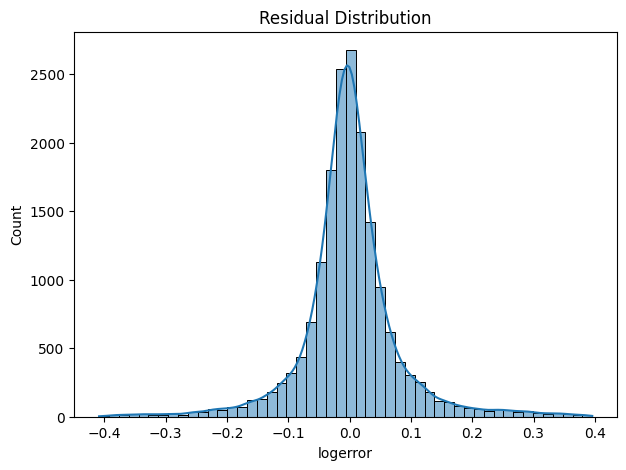

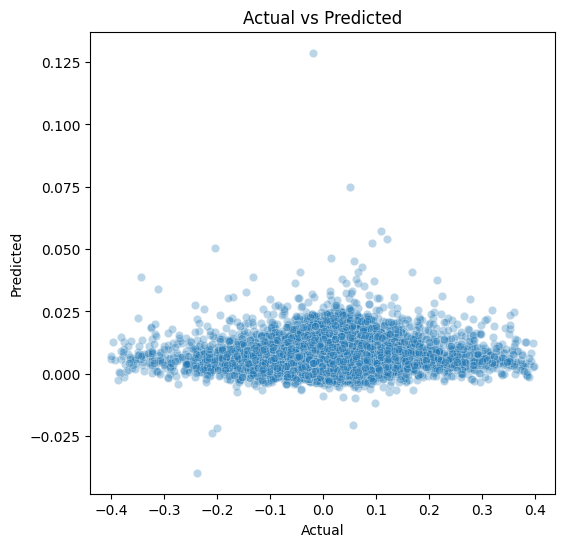

In [49]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=100),
    "Lasso": Lasso(alpha=0.001),
    "ElasticNet": ElasticNet(alpha=0.001, l1_ratio=0.5)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_val_scaled)
    
    mae = mean_absolute_error(y_val, pred)
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    r2 = r2_score(y_val, pred)
    
    results[name] = (mae, rmse, r2)
    print(f"{name}: MAE={mae:.5f}, RMSE={rmse:.5f}, R²={r2:.5f}")

import matplotlib.pyplot as plt
import seaborn as sns

model = models["Lasso"]  
pred = model.predict(X_val_scaled)
residuals = y_val - pred

plt.figure(figsize=(7,5))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Residual Distribution")
plt.show()

#predicted vs actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_val, y=pred, alpha=0.3)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [50]:
merged.to_csv("merged_clean.csv", index=False)

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

df = pd.read_csv("merged_clean.csv")
X = df.drop(["logerror"], axis=1)
y = df["logerror"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
bool_cols = [
    'has_pool','is_spa','has_luxury_pool','has_garage','garage_missing',
    'has_ac','has_heating','multi_story','has_fullbath',
    'hashottuborspa','fireplaceflag','taxdelinquencyflag'
]

for col in bool_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

In [53]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import numpy as np

xgb_model = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    tree_method="hist"
)

xgb_param_dist = {
    "n_estimators": np.arange(300, 1500, 100),
    "learning_rate": np.linspace(0.005, 0.05, 10),
    "max_depth": np.arange(3, 12),
    "subsample": np.linspace(0.6, 1.0, 10),
    "colsample_bytree": np.linspace(0.6, 1.0, 10)
}

random_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_dist,
    n_iter=50,             
    scoring="neg_mean_absolute_error",
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_xgb.fit(X_train, y_train)

best_xgb = random_xgb.best_estimator_

print("Best MAE:", -random_xgb.best_score_)
print("Best Params:", random_xgb.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best MAE: 0.05239013708088394
Best Params: {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.005, 'colsample_bytree': 0.6}


In [55]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor
import numpy as np

lgb_model = LGBMRegressor(
    objective="regression",
    device="gpu",
    gpu_platform_id=0,
    gpu_device_id=0,
    random_state=42
)

lgb_param_dist = {
    "num_leaves": np.arange(20, 150, 10),
    "learning_rate": np.linspace(0.005, 0.05, 10),
    "n_estimators": np.arange(300, 1500, 100),
    "min_child_samples": np.arange(5, 50, 5),
    "subsample": np.linspace(0.7, 1.0, 7),
    "colsample_bytree": np.linspace(0.7, 1.0, 7)
}

random_lgb = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=lgb_param_dist,
    n_iter=50,                       # same as XGB
    scoring="neg_mean_absolute_error",
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_lgb.fit(X_train, y_train)

best_lgb = random_lgb.best_estimator_

print("Best LGB MAE:", -random_lgb.best_score_)
print("Best LGB Params:", random_lgb.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


1111 warning warning warning generated generated generated.
 warning.
.
 generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning gen

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 6372
[LightGBM] [Info] Number of data points in the train set: 47162, number of used features: 50
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 32 dense feature groups (1.44 MB) transferred to GPU in 0.003582 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 0.007149
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 6371
[LightGBM] [Info] Number of data points in the train set: 47163, number of used features: 50
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel wit

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [57]:
merged16 = pd.read_csv("/kaggle/working/merged_clean.csv")
print(merged16.shape)

(88431, 52)


In [58]:
prop17 = pd.read_csv("/kaggle/input/zillow-prize-1/properties_2017.csv", low_memory=False)
df17_clean = clean_and_group_properties(prop17)

In [59]:
train17 = pd.read_csv("/kaggle/input/zillow-prize-1/train_2017.csv")

In [60]:
merged17 = train17.merge(df17_clean, on="parcelid", how="left")

merged17['transactiondate'] = pd.to_datetime(merged17['transactiondate'])
merged17['trans_year'] = merged17['transactiondate'].dt.year
merged17['trans_month'] = merged17['transactiondate'].dt.month
merged17['trans_quarter'] = merged17['transactiondate'].dt.quarter
merged17.drop(columns=['transactiondate'], inplace=True)

In [61]:
def clean_and_group_properties(df):

    # --- SAFE helper: returns column if exists else full NaNs ---
    def safe_col(col):
        return df[col] if col in df.columns else pd.Series([np.nan]*len(df))

    # 1) LIVING AREA / SQFT GROUP
    df['home_size_sqft'] = (
        safe_col('finishedsquarefeet12')
        .fillna(safe_col('calculatedfinishedsquarefeet'))
        .fillna(safe_col('finishedsquarefeet15'))
    )

    df['log_home_size'] = np.log1p(df['home_size_sqft'])

    df['sqft_per_room'] = df['home_size_sqft'] / (safe_col('roomcnt').replace(0, np.nan))
    df['sqft_per_bed'] = df['home_size_sqft'] / (safe_col('bedroomcnt').replace(0, np.nan))

    # 2) GARAGE GROUP
    df['garage_missing'] = safe_col('garagecarcnt').isna().astype(int)
    df['has_garage'] = (safe_col('garagecarcnt') > 0).astype(int)
    df['garage_car_count'] = safe_col('garagecarcnt').fillna(0)
    df['garage_sqft'] = safe_col('garagetotalsqft').fillna(0)

    # 3) POOL GROUP
    df['has_pool'] = (
        (safe_col('poolcnt') > 0) |
        safe_col('pooltypeid7').notna() |
        safe_col('pooltypeid2').notna() |
        safe_col('pooltypeid10').notna()
    ).astype(int)
    df['is_spa'] = safe_col('pooltypeid7').notna().astype(int)
    df['has_luxury_pool'] = safe_col('pooltypeid10').notna().astype(int)

    # 4) BATHROOM GROUP
    df['bathrooms'] = safe_col('bathroomcnt').fillna(safe_col('calculatedbathnbr'))
    df['has_fullbath'] = safe_col('fullbathcnt').fillna(0).astype(int)

    # 5) TAX GROUP
    df['land_to_structure_ratio'] = safe_col('landtaxvaluedollarcnt') / (
        safe_col('structuretaxvaluedollarcnt').replace(0, np.nan)
    )
    df['effective_tax_rate'] = safe_col('taxamount') / (
        safe_col('taxvaluedollarcnt').replace(0, np.nan)
    )
    df['log_total_tax_value'] = np.log1p(safe_col('taxvaluedollarcnt'))

    # 6) SYSTEMS
    df['has_ac'] = safe_col('airconditioningtypeid').notna().astype(int)
    df['has_heating'] = safe_col('heatingorsystemtypeid').notna().astype(int)
    df['multi_story'] = (safe_col('numberofstories') > 1).astype(int)

    # 7) LOCATION
    df['lat'] = safe_col('latitude') / 1e6
    df['lon'] = safe_col('longitude') / 1e6

    # 8) DROP COLUMNS if exist
    drop_cols = [
        'basementsqft','yardbuildingsqft26','decktypeid','finishedsquarefeet13',
        'buildingclasstypeid','poolsizesum','pooltypeid2','pooltypeid10',
        'storytypeid','architecturalstyletypeid','censustractandblock',
        'rawcensustractandblock','garagecarcnt','garagetotalsqft','poolcnt',
        'finishedsquarefeet12','calculatedfinishedsquarefeet',
        'finishedsquarefeet15','fullbathcnt','threequarterbathnbr',
        'bathroomcnt','calculatedbathnbr'
    ]
    df.drop(columns=[c for c in drop_cols if c in df.columns], inplace=True)

    return df

In [62]:
df17_clean = clean_and_group_properties(prop17)

In [63]:
merged17 = train17.merge(df17_clean, on="parcelid", how="left")

merged17["transactiondate"] = pd.to_datetime(merged17["transactiondate"])
merged17["trans_year"] = merged17["transactiondate"].dt.year
merged17["trans_month"] = merged17["transactiondate"].dt.month
merged17["trans_quarter"] = merged17["transactiondate"].dt.quarter
merged17.drop(columns=["transactiondate"], inplace=True)
print("Merged 2017:", merged17.shape)

Merged 2017: (77613, 61)


In [64]:
bool_cols = [
    'has_pool','is_spa','has_luxury_pool','has_garage','garage_missing',
    'has_ac','has_heating','multi_story','has_fullbath', 'hashottuborspa'
]

for col in bool_cols:
    if col in merged17.columns:
        merged17[col] = pd.to_numeric(merged17[col], errors='coerce').fillna(0).astype(int)

In [65]:
cat_cols = [
    'regionidcity','regionidcounty','regionidzip',
    'regionidneighborhood','heatingorsystemtypeid',
    'buildingqualitytypeid','fips'
]

for col in cat_cols:
    if col in merged17.columns:
        merged17[col] = merged17[col].astype('category')

In [66]:
for col in fill_zero:
    if col in merged17.columns:
        merged17[col] = merged17[col].fillna(0)

fill_minus_one = [
    'heatingorsystemtypeid',
    'buildingqualitytypeid',
    'regionidneighborhood',
    'regionidcity',
    'regionidzip',
    'regionidcounty',
    'fips'
]

for col in fill_minus_one:
    if col in merged17.columns:
        merged17[col] = pd.to_numeric(merged17[col], errors='coerce')  # convert categorical → numeric
        merged17[col] = merged17[col].fillna(-1).astype(int)           # now safe

for col in fill_median:
    if col in merged17.columns:
        merged17[col] = merged17[col].fillna( merged16[col].median() )

In [67]:
X_2017 = merged17.drop(columns=["logerror"])

In [68]:
X_2017 = merged17[X_train.columns]

In [69]:
pred_xgb_2017 = best_xgb.predict(X_2017)
print("XGB 2017 predictions ready.")

XGB 2017 predictions ready.


In [70]:
pred_lgb_2017 = best_lgb.predict(X_2017)
print("LGB 2017 predictions ready.")

LGB 2017 predictions ready.


In [71]:

pred_xgb_2017 = best_xgb.predict(X_2017)
pred_lgb_2017 = best_lgb.predict(X_2017)
pred_blend_2017 = 0.60 * pred_xgb_2017 + 0.40 * pred_lgb_2017
print("Blended predictions ready.")
final_pred = pred_blend_2017

Blended predictions ready.


In [72]:
submission = pd.DataFrame({
    "parcelid": merged17["parcelid"],
    "201610": final_pred,
    "201611": final_pred,
    "201612": final_pred,
    "201710": final_pred,
    "201711": final_pred,
    "201712": final_pred
})


submission.to_csv("submission.csv", index=False)
print("submission.csv saved!")

submission.csv saved!
